# The Pyrfume-Data Design Scheme

In [7]:
!pip install -q pyrfume  # Install pyrfume if it is not already installed

In [2]:
import pyrfume
import pandas as pd
from pprint import pprint
from IPython.display import Image

The `Pyrfume` data archives are maintained withing the [Pyrfume-Data](https://github.com/pyrfume/pyrfume-data) repository.  Every curated archive in `Pyrfume-Data` conforms to a subject/object design framework, separating the odor objects from behavior of the subject(s) under study. Within this framework there are (up to) seven standard files that describe each data archive. However, the nuances of a particular experiment/dataset may occationally require deviating from these design standards by including other non-standard files. Each standard file is described below.

## Manifest

Every `Pyrfume` data archive contains a a simple, standardized, machine-readable markup file called <span style="font-family: courier new">manifest.toml</span> that describes the data archive. Using the [TOML](https://toml.io/en/) file format, archive manifests contain sections to cite and credit relevant sources (<span style="font-family: courier new">[source]</span>), list raw (<span style="font-family: courier new">[raw]</span>) and processed (<span style="font-family: courier new">[processed]</span>) data files included in the archive while also providing any important context or metadata for interpreting the data, and lists of any code used to obtain or process raw data (<span style="font-family: courier new">[code]</span>). In certain cases, intermediate data files may exist to simplify getting from the raw data to the final processed data. When applicable such files will be listed in the manifest under a <span style="font-family: courier new">[parsed]</span> section.

As an example, the manifest for the [Burton et al., 2022](https://academic.oup.com/chemse/article/44/3/173/5292343) archive is shown below. 

In [3]:
burton_manifest = pyrfume.load_manifest('burton_2022')
pprint(burton_manifest, width=150)

{'code': {'main.py': 'Processing workflow'},
 'parsed': {'raw/XXXX_ROIPos.csv': 'X and Y coordinates for the centroids of each ROI (glom) in each experiment XXXX; exported from '
                                   "odormappingdata_fullinfo_06_2021.mat file because Matlab 'table' class is not Python readable"},
 'processed': {'behavior_1.csv': 'DeltaF response values of every ROI (glomerulus) for every odorant/mouse tested',
               'behavior_2.csv': 'Properties of diagnostic odorants with functionally-identified glomeruli. See main.py for full details',
               'behavior_3.csv': 'Properties of diagnostic odorants that consistently elicit sparse activation but did not meet the criteria for '
                                 'functional identification. See main.py for full details',
               'behavior_4.csv': 'Paths to response maps saved in .csv form for every odorant/mouse combination tested',
               'molecules.csv': 'Information about odorant molecules used

## Code

Each archive also contains a a Python script of the data processing workflow called <span style="font-family: courier new">main.py</span>. In general, raw datasets will require some combination of wrangling, cleaning, and formatting to produce the standard processed files described below. Each <span style="font-family: courier new">main.py</span> file allows `Pyrfume` users to see exactly how raw data files have been processed or to reproduce/modify the processing pipeline.  

In certain cases, additional code may be included that was used to obtain raw data (e.g. when raw data was acquired by scraping a website).

## Raw Files

When availability and file sizes permit (i.e. files should be <5 MB to be added directly), the raw data files associated with a dataset will be included in the `Pyrfume` archive. 

"Large" files (>5 MB) can still be included for an archive by committing a representative file containing only a [SHA256](https://docs.python.org/3/library/hashlib.html) hash of the real file and updating <span style="font-family: courier new">lfs-cache.csv</span> (located at the top level of the `Pyrfume-Data` repository) to have an additional row: that hash in the index and a URL to the actual file in the other column. The function `pyrfume.load_data` checks to see if the object that was loaded is a real file or a pointer to the real file.  If it is a pointer, it uses <span style="font-family: courier new">lfs-cache.csv</span> (which is just a table of such pointers and their respective URLs) and resolves to downloading whatever file it was pointing to. Using this approach, large files can be downloaded from an arbitrary URL (e.g. a Dropbox link or other GitHub repository) using `pyrfume.load_data` just as for files contained directly within an archive.

File types for raw data will vary according to the nature of any given dataset, but typical file formats include CSV, Excel, PDF, TIFF (and other image file formats), and other common formats.

## Processed Files

The `Pyrfume` standard for generating the processed files for an archive is to save subject/object data as [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) text files. The purpose of each archive's <span style="font-family: courier new">main.py</span> script is to start with the given raw data files and output the <span style="font-family: courier new">.csv</span> files described below, as appropriate. These files are the typical `Pyrfume` user's resources for machine learning, modeling, and prediction.

Several of these files are depicted in the figure below for a hypothetical (and simplified) experiment in which 2 odorants were tested on 2 animals, and data were collected across a total of 5 glomeruli.

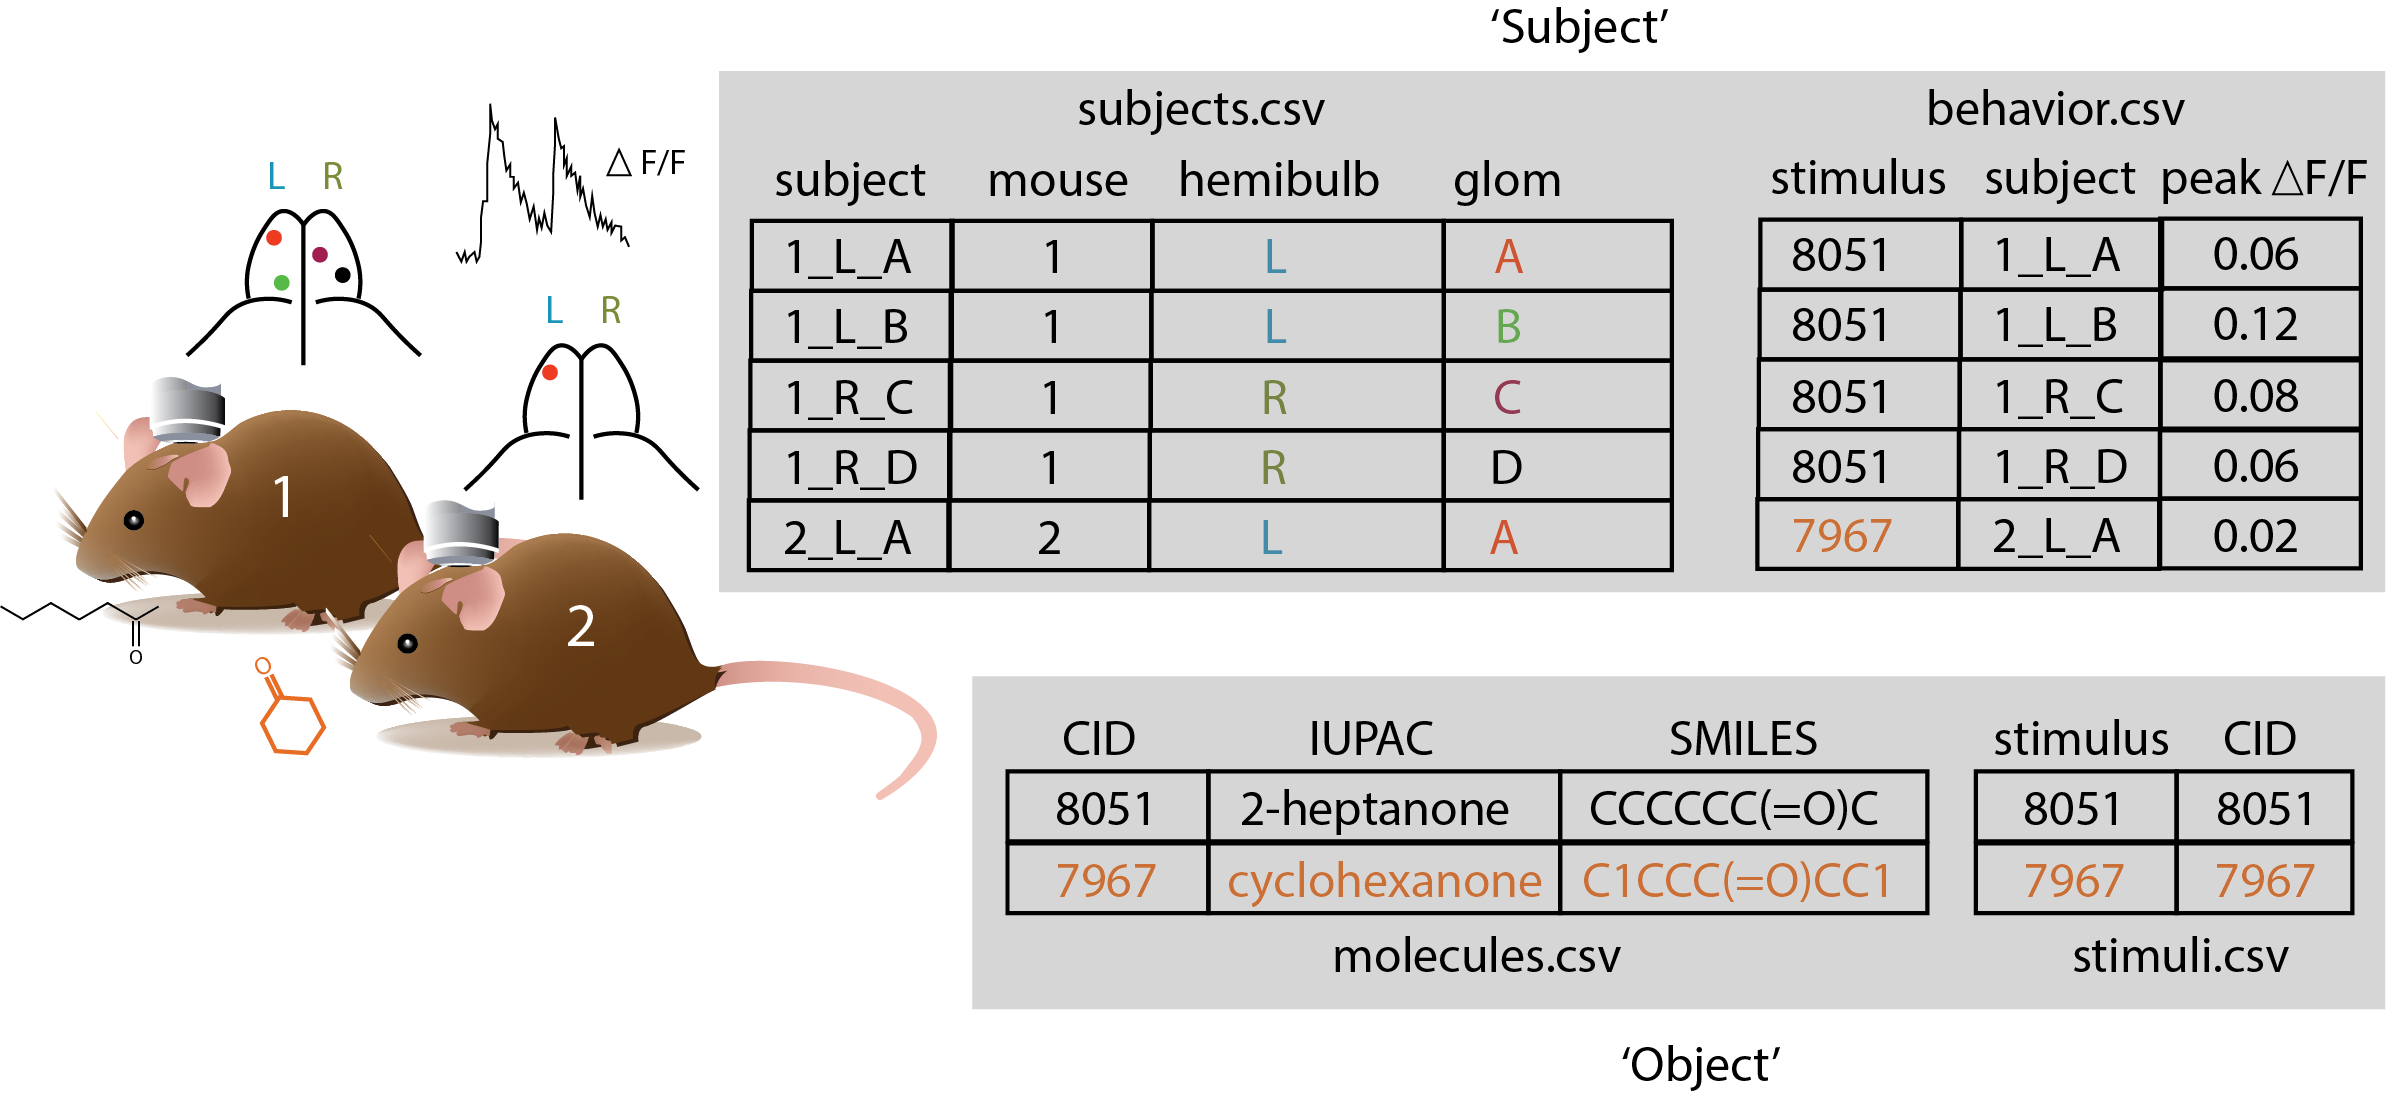

In [5]:
Image(filename='schematic_2.png', width=800) 

### 'Object' Files

At the object level, the most essential file, called <span style="font-family: courier new">stimuli.csv</span> is indexed on a stimulus ID and maps this ID to the chemical/molecular details of the odorants used. A stimulus could represent a single molecule, substance, or mixture, the applied concentration(s), and potentially other experimental conditions. 

In (typical) cases where at least one stimulus is a single molecule with known structure, the Pyrfume archive will also contain a file, <span style="font-family: courier new">molecules.csv</span>, that lists all molecules used in that dataset, with columns providing PubChem Compound IDs (CIDs), SMILES, common names, and IUPAC names. This file is useful for indexing the usage of each kind of molecule across datasets, and also for computing physicochemical features for each such molecule (software packages such as RDKit and Mordred compute these directly from a SMILES). When stimuli correspond to mixtures of unknown provenance, e.g. “cloves”, a unique stimulus ID is generated but in such cases it may not be possible to link it back to specific compounds in <span style="font-family: courier new">molecules.csv</span>.

In cases where a dataset includes calculated or experimentally measured physicochemical properties of molecules (e.g. boiling point, vapor pressure, LogP, etc.), these may be included in <span style="font-family: courier new">physics.csv</span>, typically indexed on CID.  Collectively these files describe the odorant “object”.

As an example, the first 5 rows of <span style="font-family: courier new">stimuli.csv</span> and <span style="font-family: courier new">molecules.csv</span> for the [Burton et al., 2022](https://academic.oup.com/chemse/article/44/3/173/5292343) archive are shown below. In this case, each stimulus is an odorant (identified by CID) applied at a specified concentration.

In [33]:
burton_stimuli = pyrfume.load_data('burton_2022/stimuli.csv')
burton_stimuli.head()

,CID,Conc. (mols/L)
Stimulus,,
-1_0,-1,NaN
1001_3.12e-13,1001,3.120000e-13
101010_9.38e-11,101010,9.384700e-11
10248_5.34e-12,10248,5.341713e-12
10315_5.57e-11,10315,5.570500e-11


In [34]:
burton_molecules = pyrfume.load_data('burton_2022/molecules.csv')
burton_molecules.head()

,MolecularWeight,IsomericSMILES,IUPACName,name
CID,,,,
240,106.12,C1=CC=C(C=C1)C=O,benzaldehyde,benzaldehyde
261,72.11,CCCC=O,butanal,butyraldehyde
264,88.11,CCCC(=O)O,butanoic acid,butyric acid
273,102.18,C(CCN)CCN,"pentane-1,5-diamine","pentane-1,5-diamine"
323,146.14,C1=CC=C2C(=C1)C=CC(=O)O2,chromen-2-one,coumarin


### 'Subject' Files

The subject side of the data is principally described in <span style="font-family: courier new">behavior.csv</span>, a long-format dataframe, indexed on stimulus ID. Note that within `Pyrfume`, "behavior" refers to any experimental (or computational) measurement/result. In cases where a study contains multiple experiments with distinct results, the archive will contain multiple behavior files, named <span style="font-family: courier new">behavior_1.csv</span>, <span style="font-family: courier new">behavior_2.csv</span>, etc. as needed. The contents of each behavior file will be specified in <span style="font-family: courier new">manifest.toml</span>.  For example, the (first 5 rows of the) a behavior file from the [Burton et al., 2022](https://academic.oup.com/chemse/article/44/3/173/5292343) archive is shown below. In this example, the behavior is the DeltaF/F response ilicited by each stimulus for each subject tested.

In [35]:
burton_behavior = pyrfume.load_data('burton_2022/behavior_1.csv')
burton_behavior.head()

,Subject,DeltaF
Stimulus,,
-1_0,111L_001,0.0
-1_0,111L_002,0.0
-1_0,111L_003,0.0
-1_0,111L_004,0.0
-1_0,111L_005,0.0


This format, widely referred to as [‘Tidy’](https://www.jstatsoft.org/article/view/v059i10), or sometimes ‘Third normal form’,  can easily accommodate more complex, multi-level designs, and reduces both redundancy in data representation, as well as the unnecessary proliferation of files and tables. Conversion to formats that feel more natural for many experimentalists (i.e. tables of odorants x glomerular responses, with one table per condition) is accomplished easily with standard aggregation and pivoting steps, 1-2 lines of code in Python (via [Pandas](https://pandas.pydata.org/)) or in R (via [dplyr](https://dplyr.tidyverse.org/)).

In cases where stimuli are administered to distinct subjects, a <span style="font-family: courier new">subjects.csv</span> file provides a mapping between a subject ID and that subject’s distinguishing features. A ‘subject’ could be a human (e.g. identified by age, gender, region, etc.) participating in an odor perception study or a glomerulus (e.g. identified by mouse, olfactory bulb hemisphere, etc.) being studied in a physiological experiment. Collectively <span style="font-family: courier new">subjects.csv</span> and <span style="font-family: courier new">behavior.csv</span> describe the “subject” of the experiment and its behavior(s). 

The (first 5 rows of) <span style="font-family: courier new">subjects.csv</span> for the [Burton et al., 2022](https://academic.oup.com/chemse/article/44/3/173/5292343) archive are show below. In this example each subject is a glomerulus, identfied by as an ROI (with X and Y coordinates) within the left or right olfactory hemibulb of a particular mouse, tested in a particular experiment.

In [36]:
burton_subjects = pyrfume.load_data('burton_2022/subjects.csv')
burton_subjects.head()

,Experiment,Mouse ID,Hemisphere,ROI#,Xpos,Ypos
Subject,,,,,,
111L_001,111L,111,L,1,-1561.389231,1328.850769
111L_002,111L,111,L,2,-1437.154286,858.602857
111L_003,111L,111,L,3,-1429.500000,1463.487692
111L_004,111L,111,L,4,-1349.130000,460.580000
111L_005,111L,111,L,5,-1207.525714,1703.125714


## Summary

In sum, a typical complete, archived dataset in Pyrfume contains of at up to 7 of these "standard" files: <span style="font-family: courier new">manifest.toml</span>, <span style="font-family: courier new">main.py</span>, <span style="font-family: courier new">stimuli.csv</span>, <span style="font-family: courier new">molecules.csv</span>, <span style="font-family: courier new">behavior.csv</span>, <span style="font-family: courier new">subjects.csv</span>, and <span style="font-family: courier new">physics.csv</span>,  though the latter two are found only where applicable. The number of raw or parsed files will vary depending on the nuances of a particular dataset.